In [1]:
import numpy as np

import scipy as sc
import scipy.io as scio # for loading .mat file
from scipy import linalg
from scipy.spatial import KDTree

from sklearn.decomposition import PCA as PCAdimReduc
from sklearn.feature_extraction import DictVectorizer

import networkx as nx

import pygmtools as pygm

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import pickle

from xml.dom import minidom

import functools
from itertools import product, combinations
from typing import Optional, Tuple, List
from collections import Counter, defaultdict

import struct

import os, errno
import sys

import random

pygm.BACKEND = 'numpy' # set numpy as backend for pygmtools

In [2]:
from src.svg import *
from src.extraction import *
from src.database import *
from src.matching import *
from src.labels import LABELS
len(LABELS)

250

In [3]:
def dump_graphs(graphs, prefix=""):
    with open(prefix+'graphs.p', 'wb') as f:
        pickle.dump(graphs, f)
        
def load_graphs(prefix=""):
    with open(prefix+'graphs.p', 'rb') as f:
        return pickle.load(f)

# Load graphs from disk
graphs = load_graphs()

len(graphs)

15564

In [4]:
# Construct database for online use
descriptors = map(descriptor, graphs)
features    = map(encode, graphs)
db = construct_database(descriptors, features)

d:\sketcher\src\matching.py:88: RuntimeWarning: invalid value encountered in true_divide
  A = (A / A.max()).astype(np.float32)


[1. 1. 0. 0. 0. 0. 0.]


[[(array([[2200.        , 4400.        ,  444.49070817,  110.        ,
            226.66666667,  213.33333333],
          [4800.        , 6400.        ,  353.13708499,   80.        ,
            180.        ,  237.77777778],
          [2600.        , 3200.        ,  343.2455532 ,   80.62257748,
            226.15384615,  170.76923077]]),
   array([[1.],
          [1.]], dtype=float32),
   array([[0, 1],
          [1, 0]], dtype=int64)),
  (array([[ 2693.33333333,  4320.        ,   248.27137295,    55.46570512,
             326.89108911,   197.94939494],
          [ 7053.33333333, 13440.        ,   411.57326202,    94.86832981,
             402.70447385,   243.20184835],
          [ 7000.        , 14400.        ,   411.34392015,    94.86832981,
             354.0952381 ,    86.28571429]]),
   array([[1.],
          [1.]], dtype=float32),
   array([[0, 1],
          [1, 0]], dtype=int64)),
  (array([[ 8600.        , 10800.        ,   425.11665631,    94.86832981,
             248.527131

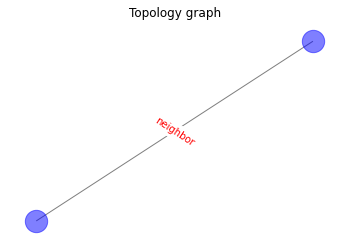

In [6]:
# Test query
db = open_database()

svg = load('assets/svg/ant/279.svg')

paths = map(to_control_points, svg['paths'])

query = extract_graph(paths, 'ant')
plot_graph(query)

key = descriptor(query, N=DESCRIPTOR_SIZE)
print(key)

query_database(db, query)